# Habitability of Planets: Traditional Model and Machine Learning

### Abstract

This paper studies about the habitability of planets using the traditional model and Machine learning. The traditional model refers to the simple model we have set up to see if a planet lies in a habitable zone. The machine learning model is more robust and takes into account more parameters and sees their correlation to predict the habitability of the planets. The confusion matrix for each model tells about how the actual and predicted values align and differ from one another.

In [1]:
# import the libraries to use in the models
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, precision_score, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler

In [2]:
# visualization function for the confusion matrix
def conf_matrix(x):
    plt.figure(dpi=100)
    sns.heatmap(x, cmap=plt.cm.Reds, annot=True, square=True,fmt='d',
               xticklabels=['not habitable', 'habitable'],
               yticklabels=['not habitable', 'habitable'])

    plt.xlabel('Predicted class')
    plt.ylabel('Actual class')

In [3]:
# read and show the data
data = pd.read_csv('./final_data_1908.csv')
display(data)

,P_NAME,P_MASS,P_PERIOD,P_SEMI_MAJOR_AXIS,S_DISTANCE,S_MASS,S_RADIUS,S_TEMPERATURE,P_DISTANCE,P_FLUX,P_TEMP_EQUIL,S_LUMINOSITY,P_HABZONE_OPT,P_HABZONE_CON,P_HABITABLE,P_ESI
0,11 Com b,6165.86330,326.030000,1.29000,93.37,2.70,19.000000,4742.0,1.324418,101.011410,799.44963,163.546800,0,0,0,0.083813
1,11 UMi b,4684.78480,516.219970,1.53000,125.72,2.78,29.790000,4213.0,1.534896,107.351180,819.07569,250.492940,0,0,0,0.082414
2,14 And b,1525.57440,185.840000,0.83000,75.59,2.20,11.000000,4813.0,0.830000,84.446427,772.30746,58.175144,0,0,0,0.081917
3,14 Her b,1481.07850,1773.400000,2.93000,17.94,0.90,0.930000,5338.0,3.130558,0.078887,131.38424,0.629171,0,0,0,0.145241
4,16 Cyg B b,565.73385,798.500000,1.66000,21.15,1.08,1.130000,5750.0,2.043792,0.618972,202.22783,1.250596,1,1,0,0.368627
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4043,K2-296 b,NaN,28.165600,0.13456,160.00,0.41,0.374241,3772.0,0.134560,1.402963,277.27227,0.025403,1,0,2,0.755038
4044,K2-296 c,NaN,7.906961,0.05769,160.00,0.41,0.374241,3772.0,0.057690,7.632679,423.46173,0.025403,0,0,0,0.363831
4045,GJ 1061 b,1.38000,3.204000,0.02100,3.69,0.12,0.156000,2953.0,0.021000,3.759699,354.75879,0.001658,0,0,0,0.588562
4046,GJ 1061 c,1.75000,6.689000,0.03500,3.69,0.12,0.156000,2953.0,0.035000,1.353492,274.79498,0.001658,1,0,1,0.879042


In [4]:
# see the data types
display(data.dtypes)

P_NAME                object
P_MASS               float64
P_PERIOD             float64
P_SEMI_MAJOR_AXIS    float64
S_DISTANCE           float64
S_MASS               float64
S_RADIUS             float64
S_TEMPERATURE        float64
P_DISTANCE           float64
P_FLUX               float64
P_TEMP_EQUIL         float64
S_LUMINOSITY         float64
P_HABZONE_OPT          int64
P_HABZONE_CON          int64
P_HABITABLE            int64
P_ESI                float64
dtype: object

In [5]:
# check if there are any null values
display(data.isna().any())

P_NAME               False
P_MASS                True
P_PERIOD              True
P_SEMI_MAJOR_AXIS     True
S_DISTANCE            True
S_MASS                True
S_RADIUS              True
S_TEMPERATURE         True
P_DISTANCE            True
P_FLUX                True
P_TEMP_EQUIL          True
S_LUMINOSITY          True
P_HABZONE_OPT        False
P_HABZONE_CON        False
P_HABITABLE          False
P_ESI                 True
dtype: bool

In [6]:
# drop the columns not used in the model
data.drop(columns=['P_NAME', 'P_HABITABLE', 'P_HABZONE_CON'], inplace=True)
# remove the missing values
data.dropna(inplace=True)

In [7]:
# data shape and the filtered data
print(data.shape)
display(data)

(1001, 13)


,P_MASS,P_PERIOD,P_SEMI_MAJOR_AXIS,S_DISTANCE,S_MASS,S_RADIUS,S_TEMPERATURE,P_DISTANCE,P_FLUX,P_TEMP_EQUIL,S_LUMINOSITY,P_HABZONE_OPT,P_ESI
0,6165.863300,326.03000,1.290,93.37,2.70,19.000,4742.0,1.324418,101.011410,799.44963,163.546800,0,0.083813
1,4684.784800,516.21997,1.530,125.72,2.78,29.790,4213.0,1.534896,107.351180,819.07569,250.492940,0,0.082414
2,1525.574400,185.84000,0.830,75.59,2.20,11.000,4813.0,0.830000,84.446427,772.30746,58.175144,0,0.081917
3,1481.078500,1773.40000,2.930,17.94,0.90,0.930,5338.0,3.130558,0.078887,131.38424,0.629171,0,0.145241
4,565.733850,798.50000,1.660,21.15,1.08,1.130,5750.0,2.043792,0.618972,202.22783,1.250596,1,0.368627
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4038,1.830689,49.41000,0.243,3.60,0.78,0.793,5344.0,0.249427,7.996323,424.09232,0.459516,0,0.446574
4039,6547.256900,305.50000,1.170,112.64,2.30,26.800,4388.0,1.170562,174.365980,925.61857,238.574880,0,0.079589
4045,1.380000,3.20400,0.021,3.69,0.12,0.156,2953.0,0.021000,3.759699,354.75879,0.001658,0,0.588562
4046,1.750000,6.68900,0.035,3.69,0.12,0.156,2953.0,0.035000,1.353492,274.79498,0.001658,1,0.879042


In [8]:
# divide the data into features and target set
features = data.drop(columns=['P_HABZONE_OPT'])
target = data.P_HABZONE_OPT

In [9]:
# see the number of types in the target set
print(target.unique())

[0 1]


In [10]:
# see if there are any missing values in the data set.
data.isnull().sum()

P_MASS               0
P_PERIOD             0
P_SEMI_MAJOR_AXIS    0
S_DISTANCE           0
S_MASS               0
S_RADIUS             0
S_TEMPERATURE        0
P_DISTANCE           0
P_FLUX               0
P_TEMP_EQUIL         0
S_LUMINOSITY         0
P_HABZONE_OPT        0
P_ESI                0
dtype: int64

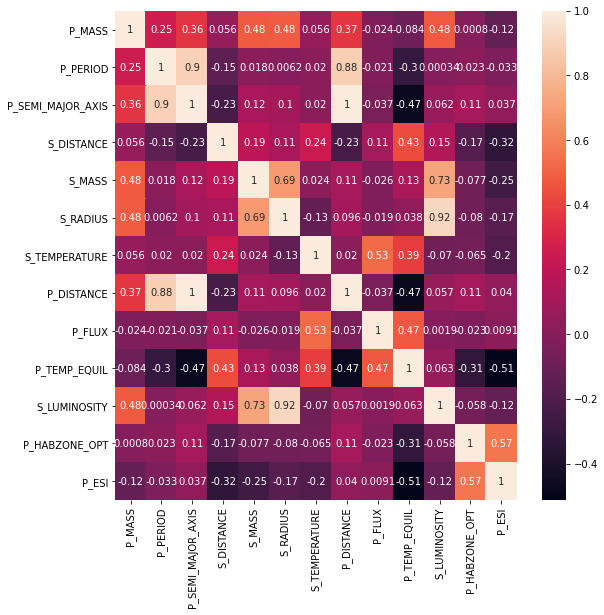

In [11]:
# visualize the correlation between the parameters
fig, ax = plt.subplots(figsize=(9,9))  
sns.heatmap(data.corr(), annot = True);

In [12]:
# divide the data into test and train set
X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=0.3, random_state=1, stratify = target)
# view the split data set
print('X train', X_train.shape)
print('y train', y_train.shape)
print('X test', X_test.shape)
print('y test', y_test.shape)

X train (700, 12)
y train (700,)
X test (301, 12)
y test (301,)


In [13]:
# standardize by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [14]:
# see the probability of occuring of the target values
target.value_counts(normalize= True)

0    0.89011
1    0.10989
Name: P_HABZONE_OPT, dtype: float64

In [15]:
# logitistic regression for class prediction
# create the model instance
model = LogisticRegression(C=100, max_iter=200, class_weight='balanced')
# fit the model for training data
model.fit(X_train, y_train)
# the accuracy of the model
model.score(X_test, y_test)

0.946843853820598

In [16]:
# check the model's stength using cross validation score
scores = cross_val_score(model, X_train, y_train, cv=10)
print(np.mean(scores))

0.93


In [17]:
# impact of data in deciding the class
data_coef = pd.DataFrame(model.coef_, columns=X_train.columns)
display(data_coef)

,P_MASS,P_PERIOD,P_SEMI_MAJOR_AXIS,S_DISTANCE,S_MASS,S_RADIUS,S_TEMPERATURE,P_DISTANCE,P_FLUX,P_TEMP_EQUIL,S_LUMINOSITY,P_ESI
0,-0.182534,-5.7744,4.969414,-0.03913,2.220571,8.867282,1.816259,-4.399291,-0.056194,-30.173257,-11.64759,4.684679


In [18]:
# predictions by the model for the test data set
predictions = model.predict(X_test)
display(predictions)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]

In [19]:
# compare the predicted values with actual values
compare_df = pd.DataFrame({'actual': y_test, 'predicted': predictions})
compare_df = compare_df.reset_index(drop = True)
display(compare_df)

,actual,predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
296,0,0
297,0,0
298,0,0
299,0,0


,0,1
0,253,15
1,1,32


Text(0.5, 1.0, 'Logistic Regression model Confusion matrix')

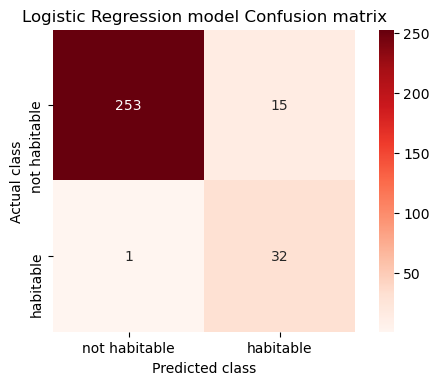

In [20]:
display(pd.DataFrame(confusion_matrix(y_test, predictions)))

conf_lr = confusion_matrix(y_test, predictions)

conf_matrix(conf_lr)
plt.title('Logistic Regression model Confusion matrix')

While using the traditional model, we have taken the liberty of assuming a earth-like milieu, so the albedo and effective greenhouse temperature are close to that of earth's. While this might not be a better approach, we look forward to gathering more data on the albedo and status of gases in the planets to have more accuracy in our traditional model.

In [21]:
def model_one_upper(L_star): #WITH GREENHOUSE EFFECT 
    s=5.67*(10**(-8)) #Stefan boltzmann constant 
    L=3.84*10**26*L_star #Luminosity or power radiated by the star
    d=149.6*10**9 #Radius of the orbit in meters multiplied by radius of star in AU 
    b=L/(4*np.pi*(d**2)) #Solar constant or apparent brightness
    b_eff=(1-0.28)*b #The effective apparent brightness that is absorbed 
    g_1=(b_eff/(4*s*(273-32)**4))**0.5 #water at 0 degrees celsius
    g_2=(b_eff/(4*s*(373-32)**4))**0.5 #water at 100 degrees celsius (both these assume that the heat is b_eff)
    return (np.round(g_1,2))

def model_one_lower(L_star): #WITH GREENHOUSE EFFECT 
    s=5.67*(10**(-8)) #Stefan boltzmann constant 
    L=3.84*10**26*L_star #Luminosity or power radiated by the star
    d=149.6*10**9 #Radius of the orbit in meters multiplied by radius of star in AU 
    b=L/(4*np.pi*(d**2)) #Solar constant or apparent brightness
    b_eff=(1-0.28)*b #The effective apparent brightness that is absorbed 
    g_1=(b_eff/(4*s*(273-28)**4))**0.5 #water at 0 degrees celsius
    g_2=(b_eff/(4*s*(373-28)**4))**0.5 #water at 100 degrees celsius (both these assume that the heat is b_eff)
    return (np.round(g_2,2))

In [22]:
# check the habitability status and create an array
L_star=(np.array(data.S_LUMINOSITY))
d=(np.array(data.P_DISTANCE))
lb=np.array(model_one_lower(L_star))
ub=np.array(model_one_upper(L_star))
hab=[]
for i in range(0,len(d)):
    if ub[i]>=d[i]>=lb[i]:
        hab.append(1)
    else:
        hab.append(0)
print(hab)

[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 

Text(0.5, 1.0, 'Traditional Model Confusion matrix')

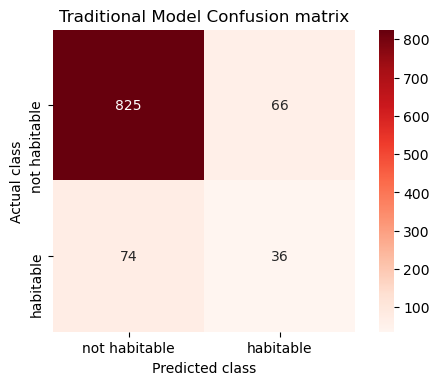

In [23]:
# the confusion matrix
conf_trad = confusion_matrix(target,hab)
conf_matrix(conf_trad)
plt.title('Traditional Model Confusion matrix')

In [24]:
def habitable_zone_GH_down(L_star,albedo,w): #WITH GREENHOUSE EFFECT 
    s=5.67*(10**(-8)) #Stefan boltzmann constant 
    L=3.84*10**26*L_star #Luminosity or power radiated by the star
    d=149.6*10**9 #Radius of the orbit in meters multiplied by radius of star in AU 
    b=L/(4*np.pi*(d**2)) #Solar constant or apparent brightness
    b_eff=(1-albedo)*b #The effective apparent brightness that is absorbed 
    g_1=(b_eff/(4*s*(273-w)**4))**0.5 #water at 0 degrees celsius
    g_2=(b_eff/(4*s*(373-w)**4))**0.5 #water at 100 degrees celsius (both these assume that the heat is b_eff)
    return g_2 #gives CHZ in astronomical units upper bound g_2) #gives CHZ lower bound

def habitable_zone_GH_up(L_star,albedo,w): #WITH GREENHOUSE EFFECT 
    s=5.67*(10**(-8)) #Stefan boltzmann constant 
    L=3.84*10**26*L_star #Luminosity or power radiated by the star
    d=149.6*10**9 #Radius of the orbit in meters multiplied by radius of star in AU 
    b=L/(4*np.pi*(d**2)) #Solar constant or apparent brightness
    b_eff=(1-albedo)*b #The effective apparent brightness that is absorbed 
    g_1=(b_eff/(4*s*(273-w)**4))**0.5 #water at 0 degrees celsius
    g_2=(b_eff/(4*s*(373-w)**4))**0.5 #water at 100 degrees celsius (both these assume that the heat is b_eff)
    return g_1 #gives CHZ in astronomical units upper bound g_2) #gives CHZ lower bound

A=(np.array(data.S_LUMINOSITY))
UB=[]
LB=[]
for i in range(0,len(A)):
        b=(habitable_zone_GH_down(A[i],0.3,0))
        c=(habitable_zone_GH_down(A[i],0,32))
        q=(habitable_zone_GH_down(A[i],0.3,100))
        e=(habitable_zone_GH_down(A[i],0.3,32))
        O=np.array([b,c,q,e])
        B=np.array(np.round((min(O)),2))
        r=(habitable_zone_GH_up(A[i],0.3,0))
        s=(habitable_zone_GH_up(A[i],0,32))
        t=(habitable_zone_GH_up(A[i],0.3,100))
        u=(habitable_zone_GH_up(A[i],0.3,32))
        v=np.array([r,s,t,u])
        D=np.round((max(v)),2)
        I=([B,D])
        I_min=(min(I))
        LB.append(I_min)
        I_max=(max(I))
        UB.append(I_max)

In [25]:
L_star=(np.array(data.S_LUMINOSITY))
d=(np.array(data.P_DISTANCE))
hf=[]
for i in range(0,len(d)):
    if UB[i]>=d[i]>=LB[i]:
        hf.append(1)
    else:
        hf.append(0)
print(hf)

[0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 

Text(0.5, 1.0, 'Traditional Model 2 Confusion matrix')

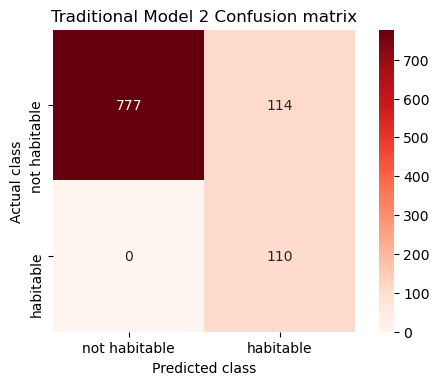

In [26]:
conf_trad = confusion_matrix(target,hf)
conf_matrix(conf_trad)
plt.title('Traditional Model 2 Confusion matrix')

### Accuracy of each model

In [27]:
# create function to find accuracy
def accuracy(tn,fp,fn,tp):
    acc = (tp+tn)/(tp+fp+tn+fn)
    return acc

In [28]:
# Linear Regression Model
print(accuracy(253,15,1,32))

0.946843853820598


In [29]:
# Traditional Model 1
print(accuracy(825,66,74,36))

0.8601398601398601


In [30]:
# Traditional Model 2
print(accuracy(777,114,0,110))

0.8861138861138861


<AxesSubplot:xlabel='P_TEMP_EQUIL', ylabel='S_LUMINOSITY'>

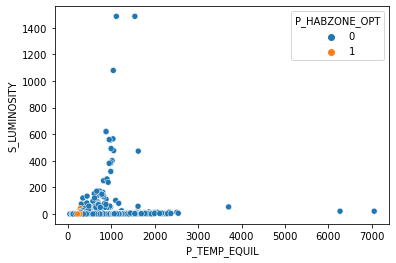

In [57]:
sns.scatterplot(data=data, x='P_TEMP_EQUIL', y="S_LUMINOSITY",hue='P_HABZONE_OPT')

<AxesSubplot:xlabel='P_ESI', ylabel='S_MASS'>

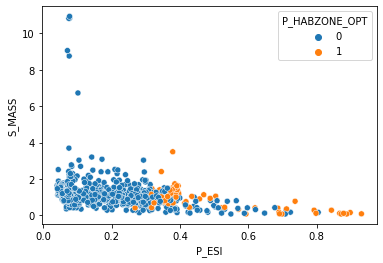

In [51]:
sns.scatterplot(data=data, y='S_MASS', x="P_ESI",hue='P_HABZONE_OPT')

### Conclusion

Comparing the accuracy of the models, the machine learning model is the most accurate. The traditional model 2 is accurate than the traditional model 1.

### TODO
Use the same number of data to check the accuracy.